<a href="https://colab.research.google.com/github/ashtheflash1212/medical_cost_predictor/blob/main/Medical_Cost_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive (12).zip')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print(df.sex.value_counts(),'\n',df.smoker.value_counts(),'\n',df.region.value_counts())


sex
male      676
female    662
Name: count, dtype: int64 
 smoker
no     1064
yes     274
Name: count, dtype: int64 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [ ]:
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [ ]:
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


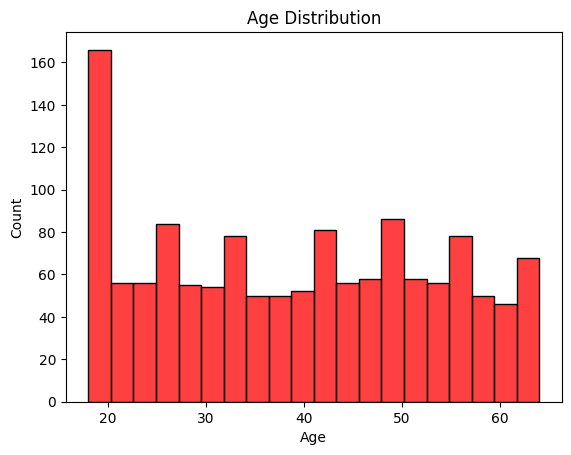

In [ ]:
#age distribution
sns.histplot(df.age,bins=20, kde=False,color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

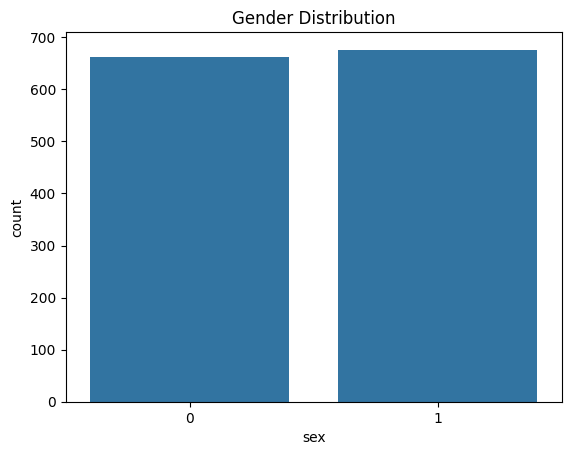

In [ ]:
#gender plot
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')

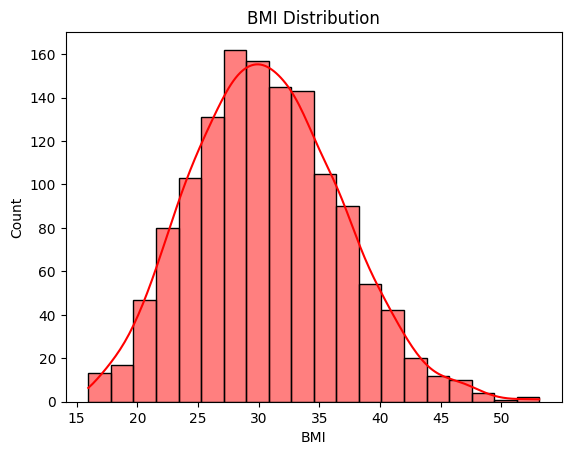

In [ ]:
sns.histplot(df.bmi,bins=20, kde=True,color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

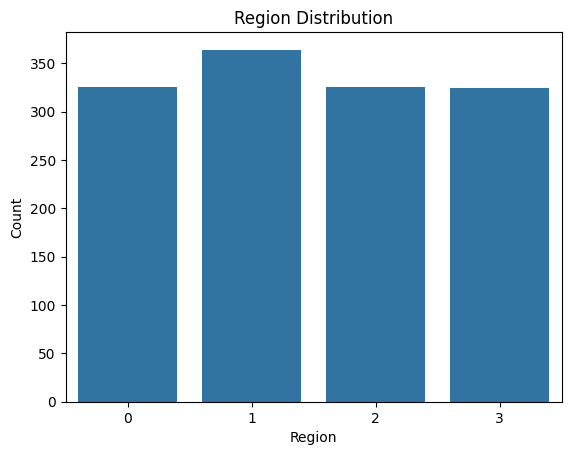

In [ ]:
#regionwise plot
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

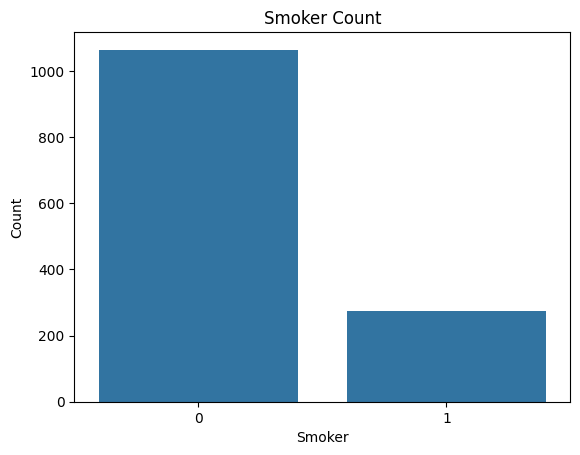

In [ ]:
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='smoker', ylabel='count'>

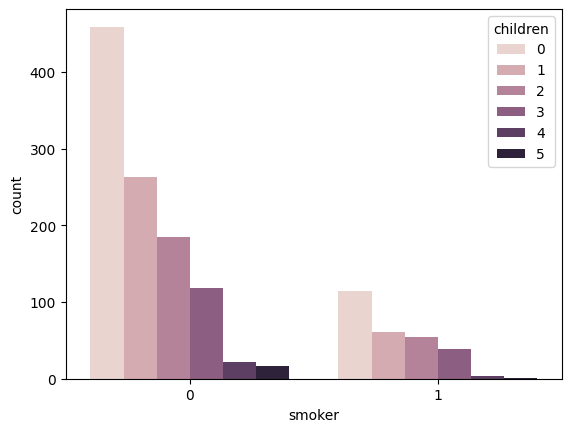

In [ ]:
sns.countplot(x = df.smoker, hue = df.children)


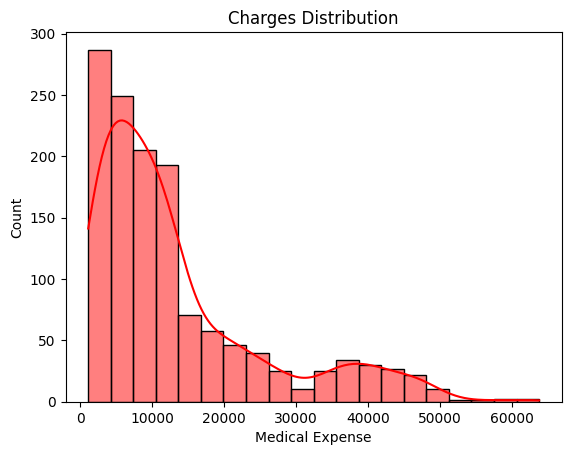

In [ ]:
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

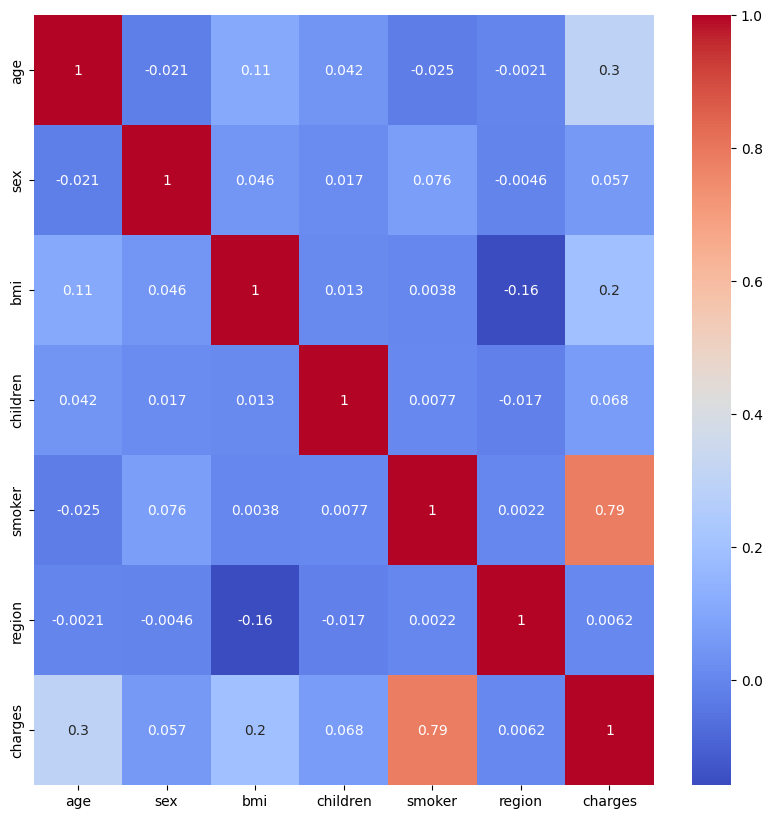

In [ ]:
#plotting the coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7306840408360217

In [ ]:
"""from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg#transforming the features to higher degree
x_train_poly = poly_reg.fit_transform(x_train)
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size=0.2, random_state=0)"""

'from sklearn.preprocessing import PolynomialFeatures\npoly_reg = PolynomialFeatures(degree=2)\npoly_reg#transforming the features to higher degree\nx_train_poly = poly_reg.fit_transform(x_train)\n#splitting the data\nx_train, x_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size=0.2, random_state=0)'

In [ ]:
plr = LinearRegression()
plr.fit(x_train,y_train)
plr.score(x_train,y_train)

0.7306840408360217

In [ ]:
y_pred = plr.predict(x_test)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [ ]:
dtree.fit(x_train,y_train)
dtree.score(x_train,y_train)

0.9994078632651511

In [ ]:
dtree_pred = dtree.predict(x_test)


In [ ]:
#Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,  #100 decision trees
                          max_depth=3,
                          min_samples_split=2,
                          min_samples_leaf=1,
                          max_features=None,
                          bootstrap=True,
                          oob_score=True,
                          random_state=42)
rf

RandomForestRegressor(max_depth=3, max_features=None, oob_score=True,
                      random_state=42)

In [ ]:
#model training
rf.fit(x_train,y_train)
#model accuracy
rf.score(x_train,y_train)

0.8484129605311438

In [ ]:
rf_pred = rf.predict(x_test)


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


<ipython-input-31-2d0e63236188>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-31-2d0e63236188>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)


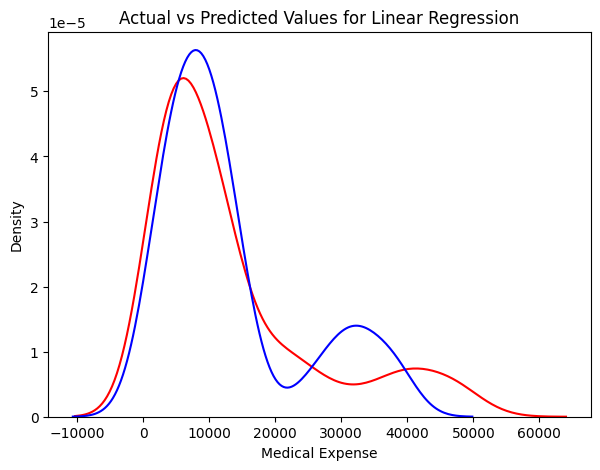

In [ ]:
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 4013.692985781196
MSE: 33311355.281859953
RMSE: 5771.59902296235
R2 Score: 0.7911113876316934


In [ ]:
""" plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.show() """

" plt.figure(figsize=(7,5))\nax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')\nsns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)\nplt.title('Actual vs Predicted Values for Polynomial Regression')\nplt.xlabel('Medical Expense')\nplt.show() "

In [ ]:
""" print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred)) """

" print('MAE:', mean_absolute_error(y_test, y_pred))\nprint('MSE:', mean_squared_error(y_test, y_pred))\nprint('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))\nprint('R2 Score:', r2_score(y_test, y_pred)) "

<ipython-input-35-46f60f40ec0e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-35-46f60f40ec0e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" ,

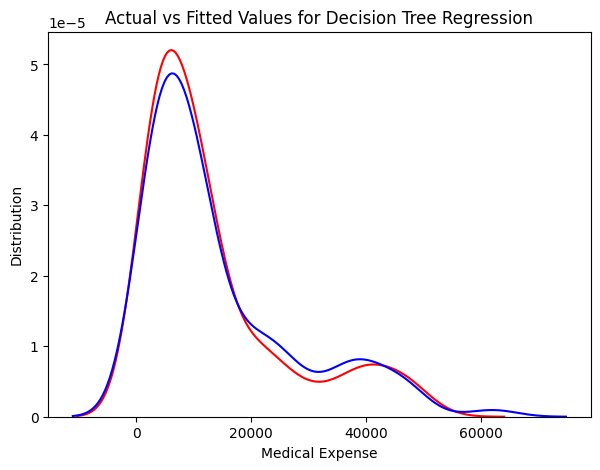

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [ ]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('R^2 Score:', dtree.score(x_test,y_test))

MAE: 3356.675697410448
MSE: 49519441.416633055
RMSE: 7037.005145417548
R^2 Score: 0.6894738351157064


The R^2 score is drops dramatically indicating that the model is overfitting for the decision tree model!

<ipython-input-37-255136d82566>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-37-255136d82566>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax

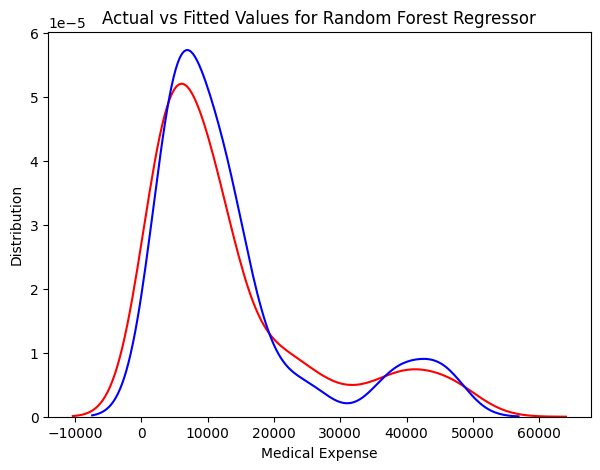

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [ ]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R^2 Score:', rf.score(x_test,y_test))

MAE: 2571.582693743162
MSE: 18014162.732328746
RMSE: 4244.30945294152
R^2 Score: 0.8870369150611482


In [ ]:
import pickle

with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf, file)
from google.colab import files
files.download("random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_score = rf.score(x_train, y_train)
test_score = rf.score(x_test, y_test)
print(f"Training R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")


Training R²: 0.8484
Test R²: 0.8870
